# Project - Flight Fare Predictions using Random Forest  

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Loading Dataset

In [2]:
train_df = pd.read_excel("./DataSets/Flight-Fare-Prediction/Train_set.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Data Preprocessing and Visualization

In [3]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Eliminating *null* values

In [4]:
train_df.dropna(inplace=True)

In [5]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
def change_into_datetime(col):
    train_df[col] = pd.to_datetime(train_df[col])

In [8]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Change required columns into Datetime format

In [9]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify in

In [10]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Extracting day, month and year from columns

In [11]:
train_df['Journey_date'] = train_df['Date_of_Journey'].dt.day
train_df['Journey_month'] = train_df['Date_of_Journey'].dt.month
train_df['Journey_year'] = train_df['Date_of_Journey'].dt.year

In [12]:
train_df.drop(['Date_of_Journey','Journey_year'], axis=1, inplace=True)

In [13]:
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-11-25 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-25 05:50:00,2023-11-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-25 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-11-25 18:05:00,2023-11-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-11-25 16:50:00,2023-11-25 21:35:00,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2023-11-25 19:55:00,2023-11-25 22:25:00,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,2023-11-25 20:45:00,2023-11-25 23:20:00,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2023-11-25 08:20:00,2023-11-25 11:20:00,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2023-11-25 11:30:00,2023-11-25 14:10:00,2h 40m,non-stop,No info,12648,3,1


### Extracting Hours and Minutes from columns

In [14]:
def extract_hour(train_df,col):
    train_df[col + '_hour'] = train_df[col].dt.hour

def extract_minute(train_df,col):
    train_df[col + '_minute'] = train_df[col].dt.minute


In [15]:
extract_hour(train_df,'Dep_Time')
extract_minute(train_df,'Dep_Time')

In [16]:
extract_hour(train_df,'Arrival_Time')
extract_minute(train_df,'Arrival_Time')

In [17]:
train_df.drop(columns=['Arrival_Time','Dep_Time'], axis=1, inplace=True)

In [18]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### Processing the *Duration* column to get numerics values of hours and minutes

In [19]:
duration = list(train_df['Duration'])
for i in range (len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
              duration[i] = duration[i] + ' 0m'
        else:
              duration[i] = '0h ' + duration[i]

In [20]:
train_df['Duration'] = duration

In [21]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [23]:
train_df['Duration Hours'] = train_df['Duration'].apply(hour).astype(int)
train_df['Duration Minutes'] = train_df['Duration'].apply(minute).astype(int)

In [24]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [25]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [26]:
train_df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_date            int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration Hours          int32
Duration Minutes        int32
dtype: object

### Splitting the dataframe into *Numerical* and *Categorical* data

In [27]:
categorical_col = [col for col in train_df.columns if train_df[col].dtype=='O']
categorical_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [28]:
numerical_col = [col for col in train_df.columns if train_df[col].dtype!='O']
numerical_col

['Price',
 'Journey_date',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration Hours',
 'Duration Minutes']

In [29]:
categorical = train_df[categorical_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [30]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Dealing with Outliers

<AxesSubplot:xlabel='Airline', ylabel='Price'>

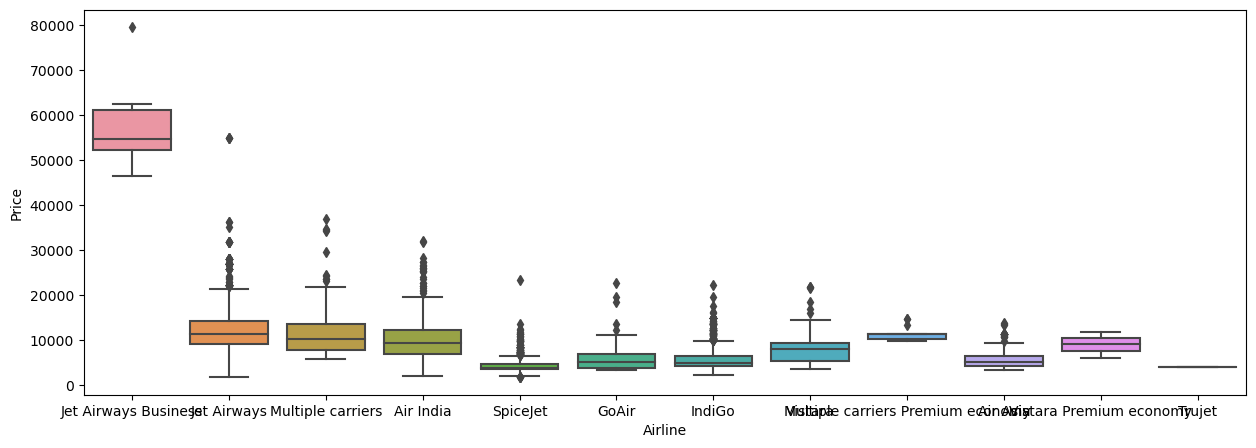

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='Airline', y ='Price', data = train_df.sort_values('Price', ascending=False))

In [32]:
Airlines_df = pd.get_dummies(categorical['Airline'], drop_first=True)
Airlines_df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

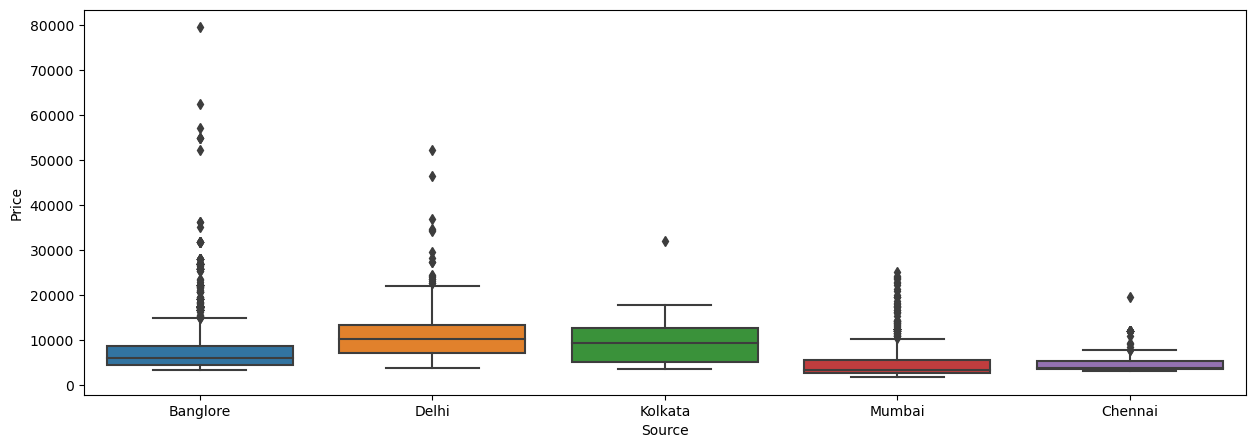

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='Source', y ='Price', data = train_df.sort_values('Price', ascending=False))

In [35]:
Source_df = pd.get_dummies(categorical['Source'], drop_first=True)
Source_df

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [36]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

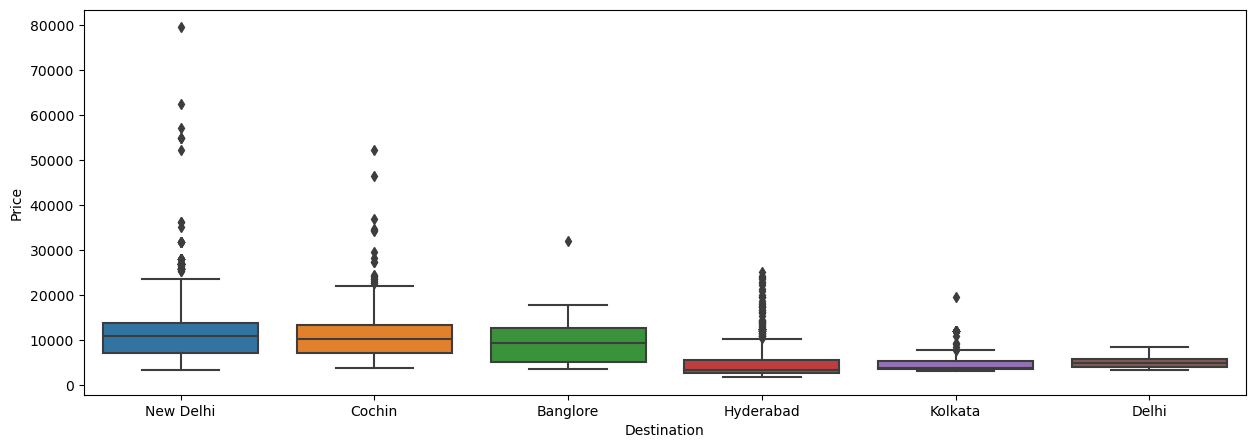

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='Destination', y ='Price', data = train_df.sort_values('Price', ascending=False))

### Performing One Hot Encoding on *Destination* column

In [38]:
Destination_df = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination_df

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


### Extracting the useful data from *Route* column by splitting using '→' as delimiter

In [39]:
route_lst = categorical['Route'].str.split('→')
route_lst

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [40]:
categorical['Route_1'] = route_lst.str[0]
categorical['Route_2'] = route_lst.str[1]
categorical['Route_3'] = route_lst.str[2]
categorical['Route_4'] = route_lst.str[3]
categorical['Route_5'] = route_lst.str[4]

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\3869634881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = route_lst.str[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_11656\3869634881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = route_lst.str[1]
C:\Users\USER\AppData\Local\Temp\ipykernel_11656\3869634881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [41]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [42]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [43]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\2414967305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


In [44]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [45]:
for i in categorical.columns:
    print('{} has total {} number of categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 number of categories
Source has total 5 number of categories
Destination has total 6 number of categories
Route has total 128 number of categories
Total_Stops has total 5 number of categories
Additional_Info has total 10 number of categories
Route_1 has total 5 number of categories
Route_2 has total 45 number of categories
Route_3 has total 30 number of categories
Route_4 has total 14 number of categories
Route_5 has total 6 number of categories


### Performing Label Encoding on extracted route data

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical[i] = le.fit_transform(categorical[i])

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\2872582271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = le.fit_transform(categorical[i])


In [49]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [50]:
categorical.drop(['Route','Additional_Info'],axis=1,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\118958002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop(['Route','Additional_Info'],axis=1,inplace=True)


In [51]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [52]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

### Mapping key values to Dictionary

In [53]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [54]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\4198516256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [55]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


### Concatinating all the new processed columns to form the training dataframe

In [56]:
train_data = pd.concat([categorical,Airlines_df,Source_df,Destination_df,train_df[numerical_col]],axis=1)

In [57]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [58]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [59]:
train_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


To view all the 35 columns present in the dataset use set_option function of pandas(required for Jupyter Notebook, not for Colab)

In [60]:
pd.set_option('display.max_columns',35)
train_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [61]:
def plot(df,col):
    fig, (ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


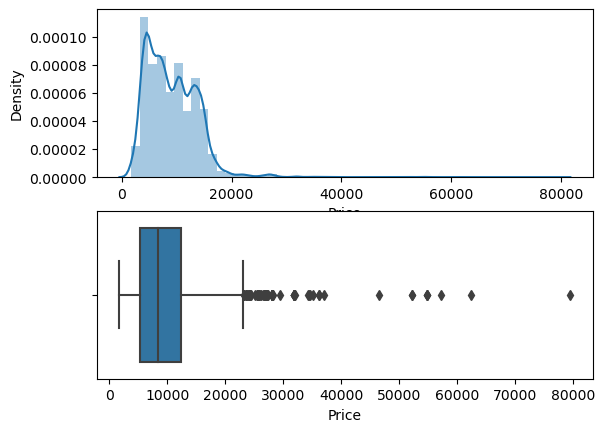

In [62]:
plot(train_data,'Price')

In [63]:
train_data['Price'] = np.where(train_data['Price']>=30000,train_data['Price'].median(),train_data['Price'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


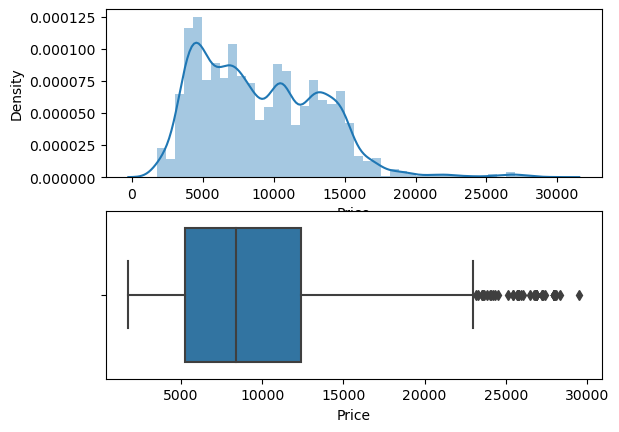

In [64]:
plot(train_data,'Price')

In [65]:
train_data.shape

(10682, 35)

## Data Splitting

In [66]:
X = train_data.drop('Price', axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [67]:
X.shape

(10682, 34)

In [68]:
y = train_data['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

### Getting the prority score of all the features wrt the Dependent feature

---



In [69]:
from sklearn.feature_selection import mutual_info_classif

In [70]:
mutual_info_classif(X,y)

array([2.1357595 , 2.04644595, 2.77757447, 2.28273712, 1.42314407,
       0.76266498, 0.79413809, 0.1111543 , 0.66156733, 0.90668036,
       0.00869287, 0.55457326, 0.00278061, 0.32682649, 0.        ,
       0.22513891, 0.        , 0.17545078, 1.52851464, 0.87806428,
       0.3036111 , 1.54478846, 0.41100117, 0.2861098 , 0.16750045,
       0.38833637, 1.0637551 , 0.85485519, 1.39734615, 1.18626037,
       1.79992585, 1.54921389, 1.77050507, 1.0524583 ])

In [71]:
importance_df = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
importance_df

,0
Total_Stops,2.161581
Route_1,2.007831
Route_2,2.804183
Route_3,2.263150
Route_4,1.425039
Route_5,0.734039
Air India,0.765354
GoAir,0.096921
IndiGo,0.674346
Jet Airways,0.933271


In [72]:
importance_df.columns = ['Importance']
importance_df.sort_values(by='Importance',ascending=False)

,Importance
Route_2,2.804183
Route_3,2.263150
Total_Stops,2.161581
Route_1,2.007831
Arrival_Time_hour,1.855025
Duration Hours,1.781607
Delhi,1.546533
Arrival_Time_minute,1.539000
Cochin,1.515966
Dep_Time_hour,1.427808


In [73]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Applying Train_Test_Split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [75]:
X_train

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
9112,1,3,7,6,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,15,6,19,15,4,25,9,10
452,2,3,0,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,27,6,19,10,12,35,17,25
2420,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18,4,10,20,12,55,2,35
9216,2,3,21,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,5,30,4,25,22,55
8486,1,3,7,6,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,14,0,19,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6561,1,2,7,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,21,10,4,40,7,30
1105,1,2,7,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,18,5,18,55,4,40,9,45
7994,1,3,7,6,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,13,0,4,25,15,25
7714,1,3,20,6,13,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,1,7,10,16,10,9,0


## Model training

### Defining a model to pass any algorithm and to calculate the r2_score, MAE, MSE, RMSE


In [76]:
def predict(algorithm):
    model = algorithm.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))

    preds = model.predict(X_test)
    print('Predictions are: {}'.format(preds))
    print('\n')

    r2_score = metrics.r2_score(y_test,preds)
    print('r2_score is:{}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,preds))
    print('MSE:',metrics.mean_squared_error(y_test,preds))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds)))
    sns.distplot(y_test-preds)

## Using RandomForestRegressor

Training Score: 0.9510944015280944
Predictions are: [19225.733      13123.00133333  5908.21       ... 10826.605
  5962.902       8317.518     ]


r2_score is:0.8293668314166227
MAE: 1125.4954324723267
MSE: 3323159.1550771487
RMSE: 1822.9534154983635


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


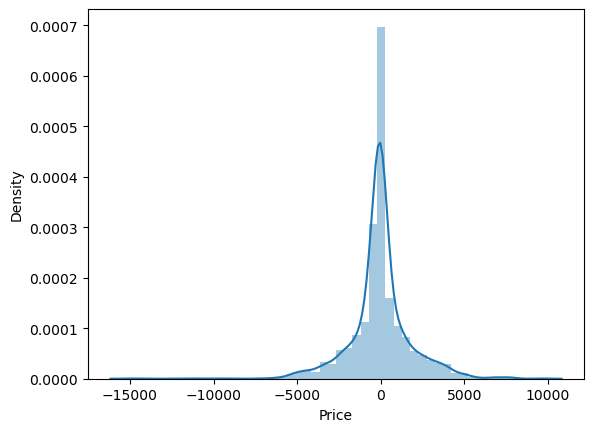

In [77]:
from sklearn.ensemble import RandomForestRegressor

predict(RandomForestRegressor())

### We are getting a model accuracy of 81%

## Using Linear Rgression

Training Score: 0.6260374979300392
Predictions are: [15566.65213724 12168.94369522  7364.89066709 ... 12071.27729795
  8147.7450489   9884.45094736]


r2_score is:0.6252558770349379
MAE: 1939.4776012700297
MSE: 7298313.530608728
RMSE: 2701.53910403102


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


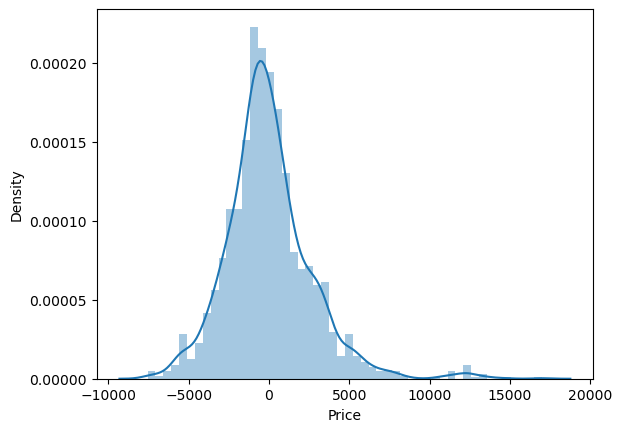

In [78]:
from sklearn.linear_model import LinearRegression

predict(LinearRegression())

### 63% of model accuracy is achieved

## Using KNNs

Training Score: 0.7838333737190375
Predictions are: [16799.6 13363.6  7112.4 ... 12500.8  6155.   8122.8]


r2_score is:0.6675566745166838
MAE: 1722.0522227421618
MSE: 6474486.114253626
RMSE: 2544.5011523388284


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


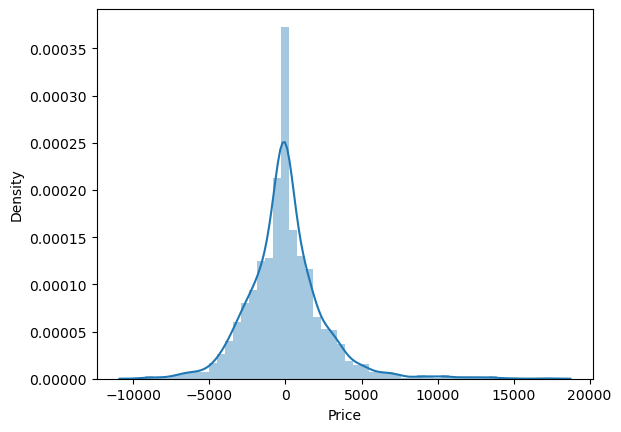

In [79]:
from sklearn.neighbors import KNeighborsRegressor

predict(KNeighborsRegressor())

### Model accuracy results to 68%

## Using Decision Tree 

Training Score: 0.9645967202701415
Predictions are: [19329.  9899.  5642. ... 10262.  7229.  7268.]


r2_score is:0.7541485465973721
MAE: 1261.459639681797
MSE: 4788069.72259177
RMSE: 2188.1658352583268


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


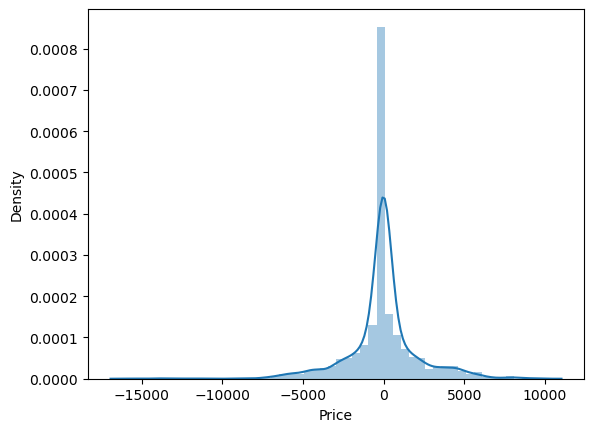

In [80]:
from sklearn.tree import DecisionTreeRegressor 

predict(DecisionTreeRegressor())

### Model Accuracy equals to 69%

## *As we can see that the Random Forest algorithm is giving the best accuracy(82%), therefore we will try some HyperParameter Tuning as this might increase the accuracy of the model*

## HyperParameter Tuning

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [83]:
random_params = {
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [84]:
random_params

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [85]:
rf = RandomForestRegressor()

In [86]:
tuned_rf =  RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_params,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [87]:
tuned_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [88]:
tuned_rf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [89]:
predictions = tuned_rf.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

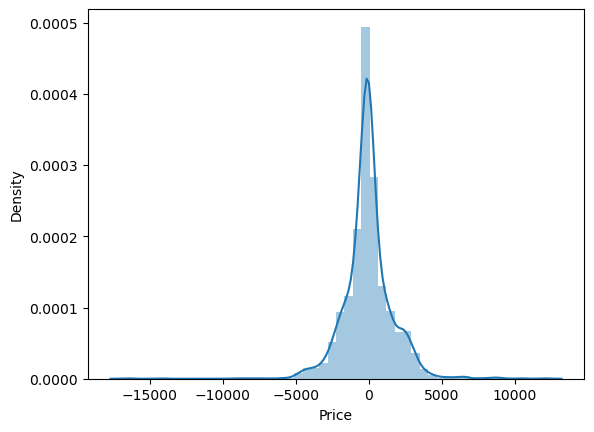

In [90]:
sns.distplot(y_test-predictions)

In [91]:
metrics.r2_score(y_test,predictions)

0.8507903598270623

In [92]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 1107.0449438443616
MSE: 2905926.1214162866
RMSE: 1704.6777177567278


## Here we are getting an improved accuracy of 84% on test data due to Hyperparameter Tuning.

In [94]:
import pickle
file = open('tuned_rf_model.pkl','wb')
pickle.dump(tuned_rf, file)

In [95]:
model = open('tuned_rf_model.pkl','rb')
forest = pickle.load(model)

In [96]:
test_df = pd.read_excel("../DataSets/Flight-Fare-Prediction/Test_set.xlsx")
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [97]:
test_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [98]:
test_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [99]:
def change_into_datetime(col):
    test_df[col] = pd.to_datetime(test_df[col])
    
    
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i) 

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify in

In [100]:
test_df['Journey_date'] = test_df['Date_of_Journey'].dt.day
test_df['Journey_month'] = test_df['Date_of_Journey'].dt.month
test_df['Journey_year'] = test_df['Date_of_Journey'].dt.year

In [101]:
def extract_hour(test_df,col):
    test_df[col + '_hour'] = test_df[col].dt.hour

def extract_minute(train_df,col):
    test_df[col + '_minute'] = test_df[col].dt.minute
    
extract_hour(test_df,'Dep_Time')
extract_minute(test_df,'Dep_Time')

extract_hour(test_df,'Arrival_Time')
extract_minute(test_df,'Arrival_Time')

test_df.drop(columns=['Arrival_Time','Dep_Time'], axis=1, inplace=True)

In [102]:
duration = list(test_df['Duration'])
for i in range (len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
              duration[i] = duration[i] + ' 0m'
        else:
              duration[i] = '0h ' + duration[i]

In [103]:
test_df['Duration'] = duration

In [104]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

test_df['Duration Hours'] = test_df['Duration'].apply(hour).astype(int)
test_df['Duration Minutes'] = test_df['Duration'].apply(minute).astype(int)

test_df.drop(['Duration'],axis=1,inplace=True)


In [105]:
categorical_col = [col for col in test_df.columns if test_df[col].dtype=='O']
categorical_col

numerical_col = [col for col in test_df.columns if test_df[col].dtype!='O']
numerical_col

['Date_of_Journey',
 'Journey_date',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration Hours',
 'Duration Minutes']

In [106]:
categorical = test_df[categorical_col]

In [107]:
Airlines_df = pd.get_dummies(categorical['Airline'], drop_first=True)

Destination_df = pd.get_dummies(categorical['Destination'], drop_first=True)

Source_df = pd.get_dummies(categorical['Source'], drop_first=True)

route_lst = categorical['Route'].str.split('→')
categorical['Route_1'] = route_lst.str[0]
categorical['Route_2'] = route_lst.str[1]
categorical['Route_3'] = route_lst.str[2]
categorical['Route_4'] = route_lst.str[3]
categorical['Route_5'] = route_lst.str[4]

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\1071776984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = route_lst.str[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_11656\1071776984.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = route_lst.str[1]
C:\Users\USER\AppData\Local\Temp\ipykernel_11656\1071776984.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [108]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)
    
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical[i] = le.fit_transform(categorical[i])

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\2410714982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11656\2410714982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = le.fit_transform(categorical[i])


In [109]:
categorical.drop(['Route','Additional_Info'],axis=1,inplace=True)

dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

C:\Users\USER\AppData\Local\Temp\ipykernel_11656\3900219320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop(['Route','Additional_Info'],axis=1,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11656\3900219320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [110]:
test_data = pd.concat([categorical,Airlines_df,Source_df,Destination_df,test_df[numerical_col]],axis=1)
test_data.drop(['Airline','Source','Destination','Date_of_Journey'],axis=1,inplace=True)
test_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes
0,1,3,7,5,9,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,2019,17,30,4,25,10,55
1,1,2,29,3,9,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,2019,6,20,10,20,4,0
2,1,3,7,5,9,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,2019,19,15,19,0,23,45
3,1,3,7,5,9,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,2019,8,0,21,0,13,0
4,0,0,13,27,9,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,6,2019,23,55,2,45,2,50


In [111]:
test_data.shape

(2671, 34)

In [112]:
# Predict with model
test_preds = forest.predict(test_data)
test_preds

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Journey_year
Feature names seen at fit time, yet now missing:
- Trujet

  warnings.warn(message, FutureWarning)


array([11750.85390811,  5908.30991681, 12788.65711723, ...,
       13103.71293546,  9767.83105612, 10486.08600431])

In [113]:
test_df['Predicted Price'] = test_preds
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration Hours,Duration Minutes,Predicted Price
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,55,11750.853908
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,2019,6,20,10,20,4,0,5908.309917
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23,45,12788.657117
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,13,0,12248.235024
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,2,50,6475.281796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,2019,20,30,20,25,23,55,11283.103777
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,2019,14,20,16,55,2,35,9850.283995
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,2019,21,50,4,25,6,35,13103.712935
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,2019,4,0,19,15,15,15,9767.831056
